**Library** (https://www.netplotbrain.org/)

In [83]:
pip install netplotbrain

**Libraries**

In [84]:
import pandas as pd
import netplotbrain
import matplotlib.pyplot as plt

**Coordinates**

In [99]:
coordinates=pd.read_csv("/content/drive/MyDrive/Cell_Proportion/Coordinates/rna_micro_2.csv")
print("\n-----------------------------------------------------------------------\n")
print("RNA-seq file:\n","\n",coordinates)
print("\n-----------------------------------------------------------------------\n")


-----------------------------------------------------------------------

RNA-seq file:
 
      well_id main_structure sub_structure  ontology_structure_id  \
0        105             PL           SPL                   4101   
1        113             PL           SPL                   4101   
2        193             PL           SPL                   4099   
3        145             PL         AnG-s                   4113   
4        114             FL         SFG-l                   4027   
..       ...            ...           ...                    ...   
116     1217            Str       Putamen                   4289   
117     1217            Str       Putamen                   4289   
118     1178             GP            GP                   4298   
119     1179             GP            GP                   4295   
120     1187            Str       Caudate                   4282   

     structure_id                                     structure_name  mni_x  \
0            

**Keep selected columns**

In [100]:
coordinates=coordinates[["ontology_structure_id","structure_name","main_structure", "mni_x","mni_y","mni_z"]]
print("\n-----------------------------------------------------------------------\n")
print("RNA-seq file columns select:\n","\n",coordinates)
print("\n-----------------------------------------------------------------------\n")


-----------------------------------------------------------------------

RNA-seq file columns select:
 
      ontology_structure_id                                     structure_name  \
0                     4101  supraparietal lobule, Right, superior bank of ...   
1                     4101  supraparietal lobule, Right, superior bank of ...   
2                     4099  supraparietal lobule, Left, inferior bank of g...   
3                     4113        angular gyrus, Left, superior bank of gyrus   
4                     4027  superior frontal gyrus, Right, lateral bank of...   
..                     ...                                                ...   
116                   4289                                     Putamen, Right   
117                   4289                                     Putamen, Right   
118                   4298           globus pallidus, external segment, Right   
119                   4295            globus pallidus, external segment, Left   
120

**Select general guidelines**

In [101]:
coordinates=coordinates.set_index("main_structure")
print("\n-----------------------------------------------------------------------\n")
print("Set index: \n",coordinates)
print("\n-----------------------------------------------------------------------\n")


-----------------------------------------------------------------------

Set index: 
                 ontology_structure_id  \
main_structure                          
PL                               4101   
PL                               4101   
PL                               4099   
PL                               4113   
FL                               4027   
...                               ...   
Str                              4289   
Str                              4289   
GP                               4298   
GP                               4295   
Str                              4282   

                                                   structure_name  mni_x  \
main_structure                                                             
PL              supraparietal lobule, Right, superior bank of ...   32.3   
PL              supraparietal lobule, Right, superior bank of ...   11.2   
PL              supraparietal lobule, Left, inferior bank of g...  -18.4   

**Select cortical samples (or non-cortical samples)**

In [105]:
lobe=coordinates.loc[["FL","PL","TL","OL"]]
print("\n-----------------------------------------------------------------------\n")
print("Juts structures of interest:","\n",lobe)


-----------------------------------------------------------------------

Juts structures of interest: 
                 ontology_structure_id  \
main_structure                          
FL                               4027   
FL                               4061   
FL                               4048   
FL                               4051   
FL                               4051   
...                               ...   
OL                               4194   
OL                               4196   
OL                               4193   
OL                               4194   
OL                               4197   

                                                   structure_name  mni_x  \
main_structure                                                             
FL              superior frontal gyrus, Right, lateral bank of...   28.2   
FL                                   lateral orbital gyrus, Right   37.5   
FL                                             gyrus rect

**Select coordinates**

In [106]:
lobe=lobe[["mni_x","mni_y","mni_z"]]
print("\n-----------------------------------------------------------------------\n")
print("Coordinates: \n",lobe)


-----------------------------------------------------------------------

Coordinates: 
                 mni_x  mni_y  mni_z
main_structure                     
FL               28.2   59.8    9.2
FL               37.5   53.1   -8.4
FL                0.5   52.3  -21.4
FL              -10.0   54.2  -17.6
FL              -10.0   54.2  -17.6
...               ...    ...    ...
OL               -8.0  -74.2    7.6
OL               19.1  -87.1  -14.0
OL              -12.4  -82.9  -16.6
OL               -5.6  -62.9    8.9
OL               29.4  -56.7    0.8

[92 rows x 3 columns]


**Change column labels**

In [107]:
lobe=lobe[["mni_x","mni_y","mni_z"]]
print("\n-----------------------------------------------------------------------\n")
lobe=lobe.rename(columns={"mni_x": "x", "mni_y": "y", "mni_z": "z"}, errors="raise")
print("Change columns name: \n",lobe)


-----------------------------------------------------------------------

Change columns name: 
                    x     y     z
main_structure                  
FL              28.2  59.8   9.2
FL              37.5  53.1  -8.4
FL               0.5  52.3 -21.4
FL             -10.0  54.2 -17.6
FL             -10.0  54.2 -17.6
...              ...   ...   ...
OL              -8.0 -74.2   7.6
OL              19.1 -87.1 -14.0
OL             -12.4 -82.9 -16.6
OL              -5.6 -62.9   8.9
OL              29.4 -56.7   0.8

[92 rows x 3 columns]


In [108]:
print("\n-----------------------------------------------------------------------\n")
print("Index: \n",lobe.index.unique())


-----------------------------------------------------------------------

Index: 
 Index(['FL', 'PL', 'TL', 'OL'], dtype='object', name='main_structure')


**Colors**

In [109]:
lobe_colors_dict={


            'FL':"cornflowerblue",
            'PL':"slateblue",
            'TL':"#db7093",
            'OL':"violet",

            'Str':"#008b8b",
            'Ins':"salmon",
            'PHG':"#8fbc8f",
            'CgG':"#deb887",
            'GP':"slategray",

            'CbCx': "khaki"
    }


lobe_colors = [lobe_colors_dict.get(lobe, 'default_color') for lobe in lobe.index]

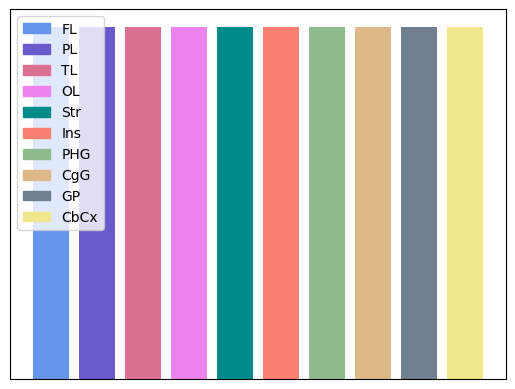

In [110]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


legend_patches = [Patch(color=color, label=key) for key, color in lobe_colors_dict.items()]

# Plotting a bar chart with colors
fig, ax = plt.subplots()
bars = ax.bar(range(len(lobe_colors_dict)), [1]*len(lobe_colors_dict), color=list(lobe_colors_dict.values()))

# Add legend
ax.legend(handles=legend_patches, loc='upper left')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
  #Save figure
#plt.savefig('color_plot.png')
plt.show()

(<Figure size 900x600 with 6 Axes>,
 [<Axes3D: title={'center': 'Left'}>,
  <Axes3D: title={'center': 'Superior'}>,
  <Axes3D: title={'center': 'Right'}>,
  <Axes3D: title={'center': 'Anterior'}>,
  <Axes3D: title={'center': 'Inferior'}>,
  <Axes3D: title={'center': 'Posterior'}>])

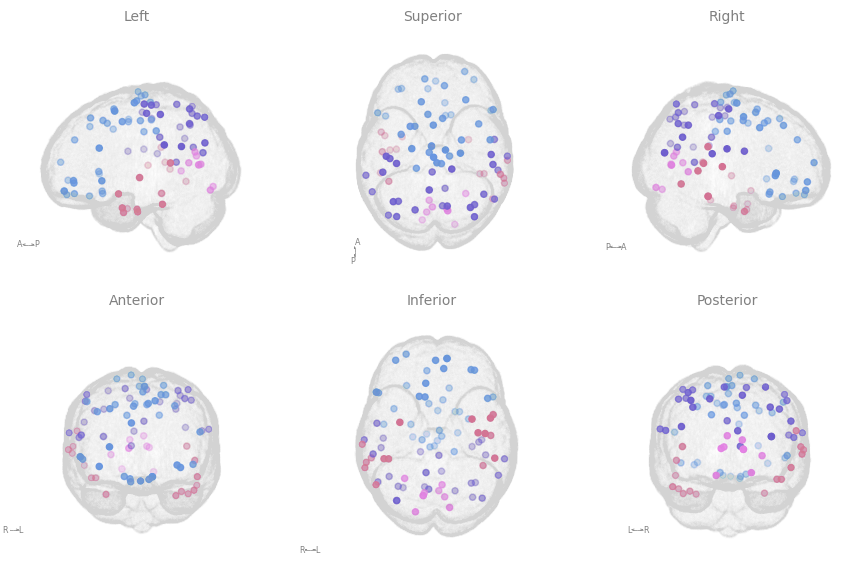

In [ ]:
  # Set the image size
fig_size = (128, 96)  # Specify the width and height of the image in inches


  # Plot figure with the specified image size
netplotbrain.plot(template='MNI152NLin2009cAsym',
                  template_style='glass',
                  nodes=lobe,
                  view=['LSR', 'AIP'],
                  figsize=fig_size,
                  template_glass_maxalpha=0.03,
                  node_color=lobe_colors,
                  node_scale=20)

  #Save figure
#plt.savefig('Brain_non-cortical.png')